## **BLINKIT DATA ANALYSIS PROJECT BY ANKAN MAITI**

### **IMPORT NECESSARY LIBRARIES**

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


### **IMPORT RAW DATASET**

In [3]:
df=pd.read_csv("E:/Self Project/P-1 blinkit analysis using python/blinkit_data.csv")



### **SAMPLE RAW DATA**

In [4]:
head_df = df.head(10)
tail_df = df.tail(10)

display(head_df)
display(tail_df)


,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8513,Regular,DRY23,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.108568,NaN,42.9112,4.0
8514,low fat,FDA11,Baking Goods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.043029,NaN,94.7436,4.0
8515,low fat,FDK38,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.053032,NaN,149.1734,4.0
8516,low fat,FDO38,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.072486,NaN,78.9986,4.0
8517,low fat,FDG32,Fruits and Vegetables,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.175143,NaN,222.3772,4.0
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


### **RAW DATA DESCRIPTION**

In [14]:
print("size of the data is :",df.shape)
data_columns=df.columns
display(data_columns)
df.dtypes

size of the data is : (8523, 12)


Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

### **DATA CLEANING**
##### **Categorical variables like Item Fat Content  need standardization (e.g., “low fat” vs “Low Fat”,"LF" vs“Low Fat”,"reg" vs "Regular" ).**
##### **There is miising  values in 'Item Weight'; so I Impute missing 'Item Weight' with mean weight per 'Item Type'.**

In [5]:
df_new = df.copy()

# Standardizing 'Item Fat Content' labels
df_new['Item Fat Content'] = df_new['Item Fat Content'].str.strip().replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular',
    'Regular': 'Regular'
})

print("Unique Fat Content Categories:", df_new['Item Fat Content'].unique())

# Checking missing values in 'Item Weight' before imputation
missing_before = df_new['Item Weight'].isnull().sum()
print("Missing values in 'Item Weight' before:", missing_before)

# Imputing missing 'Item Weight' with mean weight per 'Item Type'
df_new['Item Weight'] = df_new.groupby('Item Type')['Item Weight'].transform(
    lambda x: x.fillna(x.mean())
)

# Check missing values after imputation
missing_after = df_new['Item Weight'].isnull().sum()
print("Missing values in 'Item Weight' after:", missing_after)


Unique Fat Content Categories: ['Regular' 'Low Fat']
Missing values in 'Item Weight' before: 1463
Missing values in 'Item Weight' after: 0


### **CLEANED DATA**


In [6]:
head_df = df_new.head(10)
tail_df = df_new.tail(10)

display(head_df)
display(tail_df)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.100000,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.800000,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.850000,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.150000,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.600000,55.1614,5.0
5,Low Fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.890000,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.800000,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.700000,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.750000,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,12.305705,181.9292,5.0


,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8513,Regular,DRY23,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.108568,11.847460,42.9112,4.0
8514,Low Fat,FDA11,Baking Goods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.043029,12.277108,94.7436,4.0
8515,Low Fat,FDK38,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.053032,12.305705,149.1734,4.0
8516,Low Fat,FDO38,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.072486,12.305705,78.9986,4.0
8517,Low Fat,FDG32,Fruits and Vegetables,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.175143,13.224769,222.3772,4.0
8518,Low Fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,13.142314,164.5526,4.0
8519,Low Fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,12.987880,241.6828,4.0
8520,Low Fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,11.847460,86.6198,4.0
8521,Regular,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,13.426069,97.8752,4.0
8522,Regular,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,12.987880,112.2544,4.0


### **KEY PERFORMANCE INDICATORS**





C:\Users\maiti\AppData\Local\Temp\ipykernel_3644\3067158944.py:18: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\maiti\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


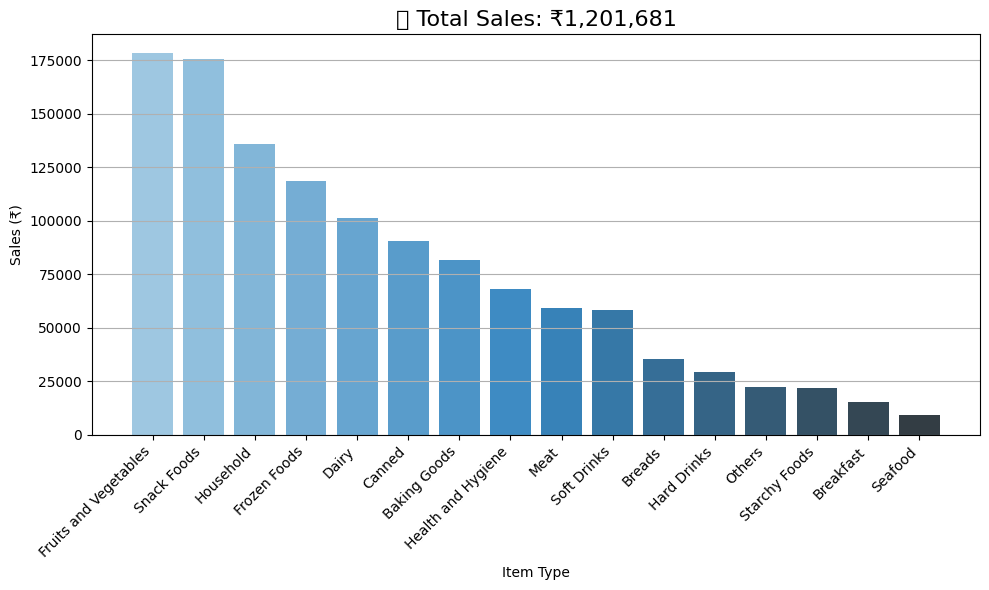

C:\Users\maiti\AppData\Local\Temp\ipykernel_3644\3067158944.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales.head(10).values, y=avg_sales.head(10).index, palette='viridis')


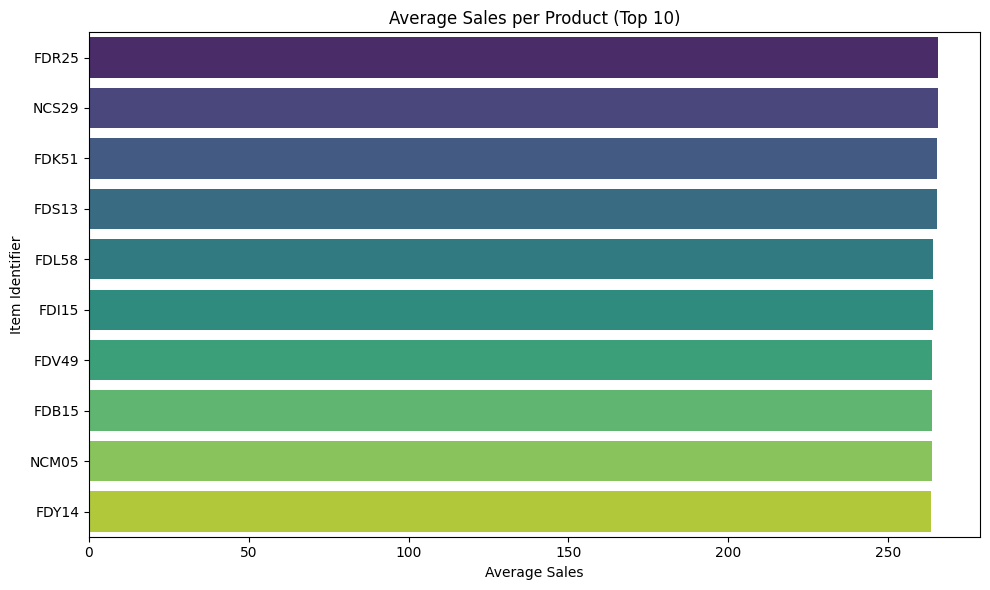

C:\Users\maiti\AppData\Local\Temp\ipykernel_3644\3067158944.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_selling.values, y=top_selling.index, palette='magma')


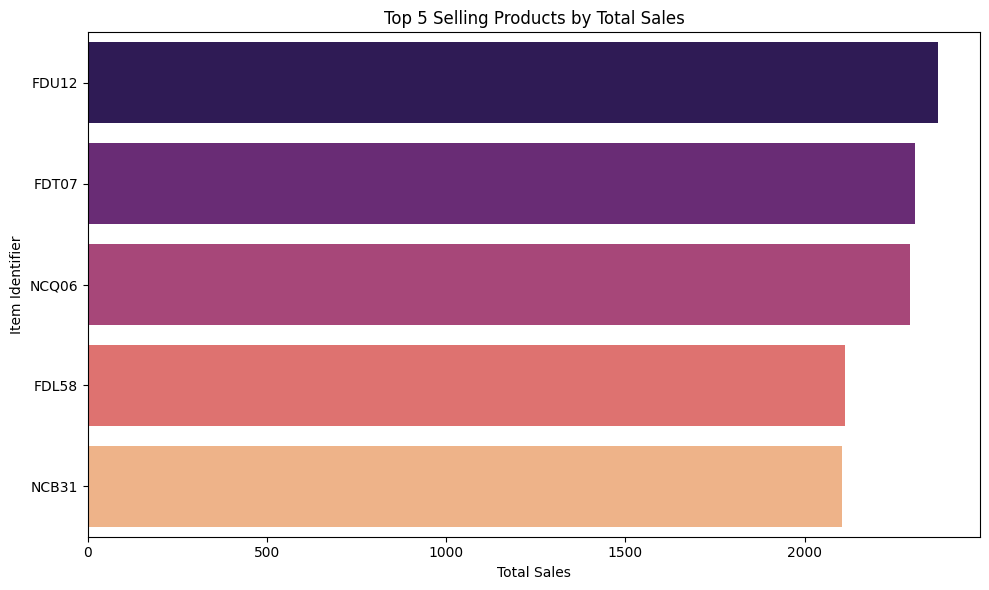

C:\Users\maiti\AppData\Local\Temp\ipykernel_3644\3067158944.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_type.values, y=sales_by_type.index, palette='cubehelix')


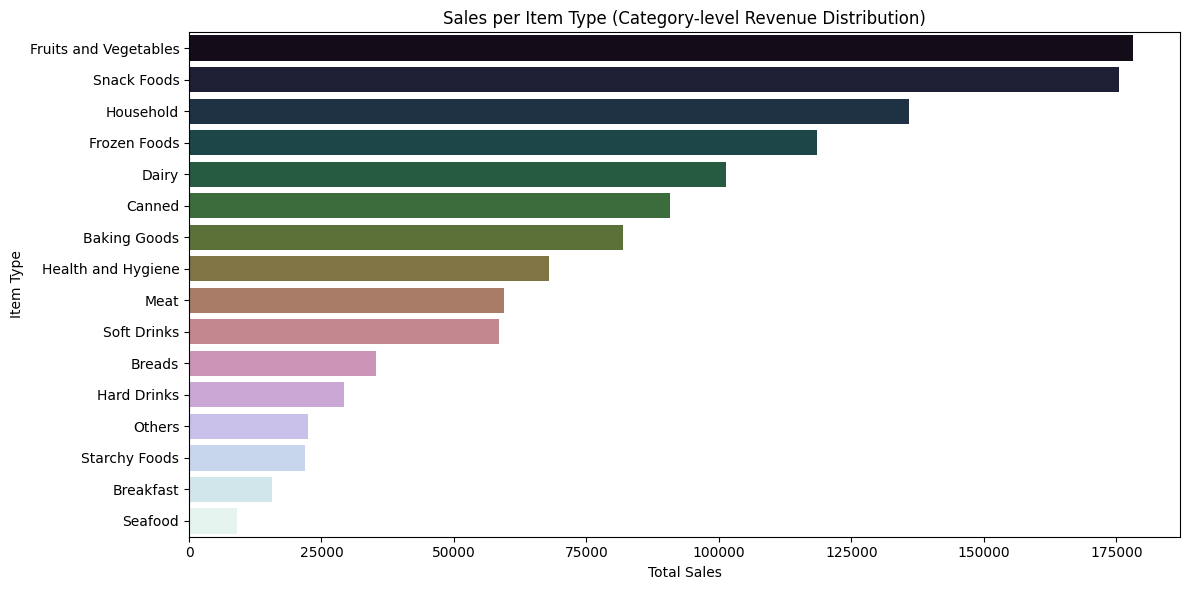

C:\Users\maiti\AppData\Local\Temp\ipykernel_3644\3067158944.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_outlet.values, y=sales_by_outlet.index, palette='coolwarm')


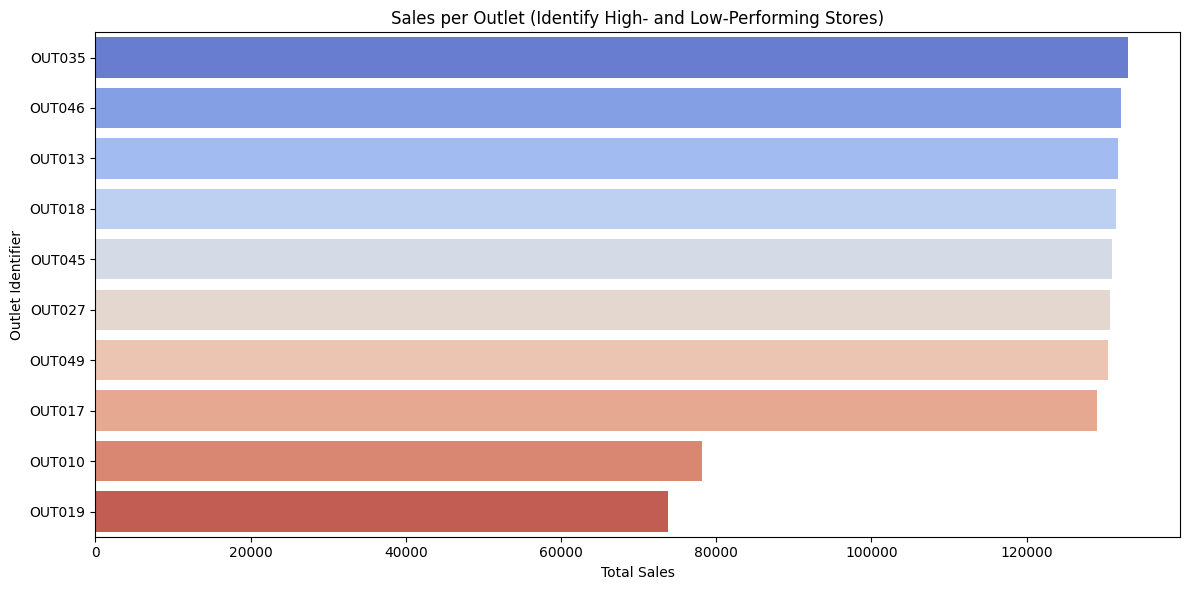

C:\Users\maiti\AppData\Local\Temp\ipykernel_3644\3067158944.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_by_type.values, y=avg_sales_by_type.index, palette='Set2')


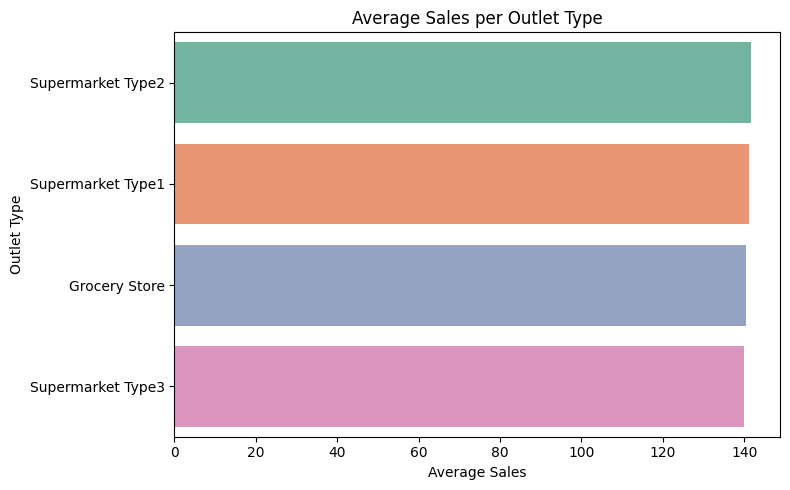

C:\Users\maiti\AppData\Local\Temp\ipykernel_3644\3067158944.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_age.index, y=sales_by_age.values, palette='Blues')


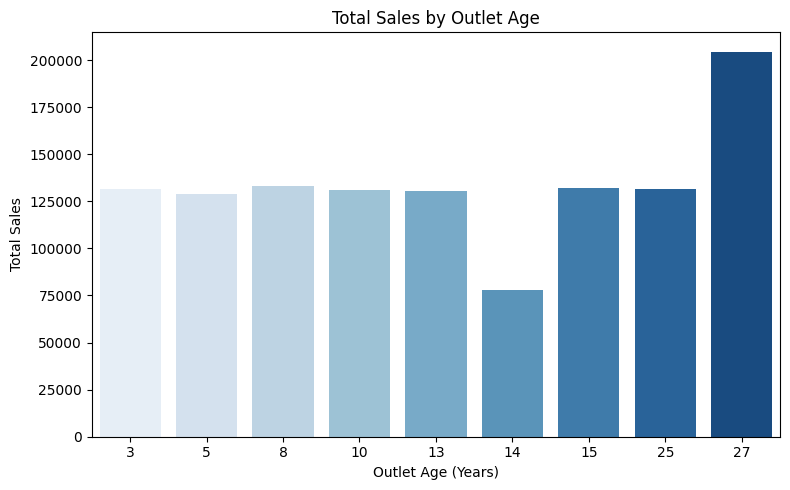

C:\Users\maiti\AppData\Local\Temp\ipykernel_3644\3067158944.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_location.index,y=sales_by_location.values,palette='Set3')
C:\Users\maiti\AppData\Local\Temp\ipykernel_3644\3067158944.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_new, y='Outlet Size', order=df_new['Outlet Size'].value_counts().index, palette='Pastel1')


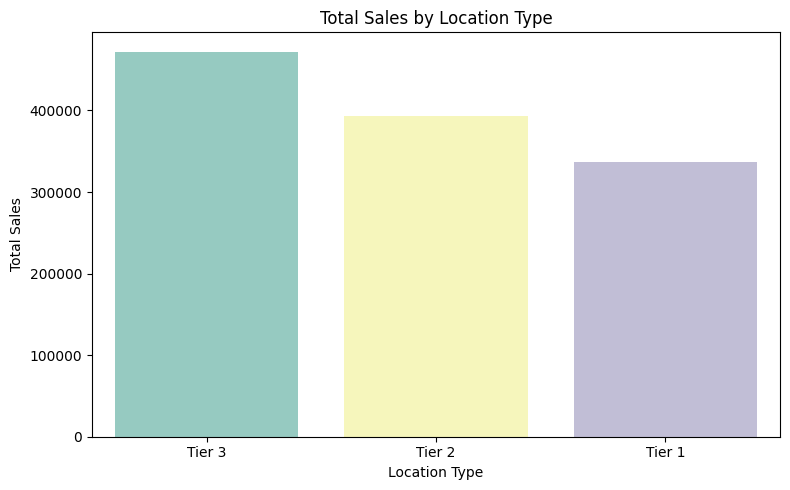

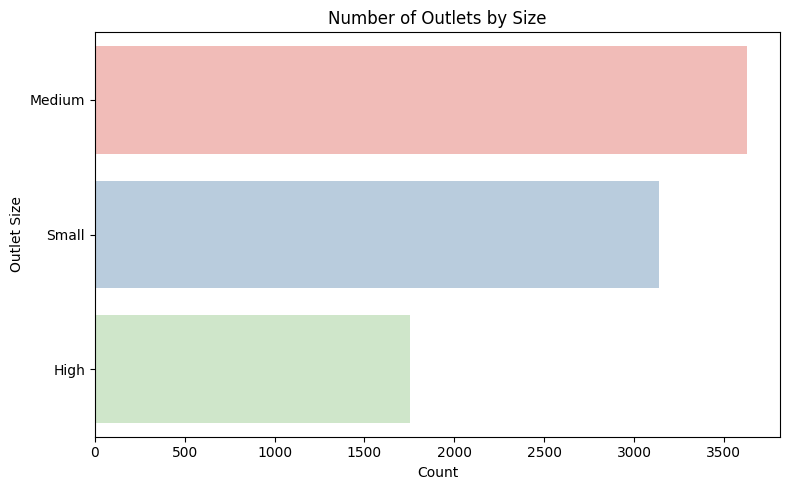

C:\Users\maiti\AppData\Local\Temp\ipykernel_3644\3067158944.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_by_size.values, y=avg_sales_by_size.index, palette='cool')


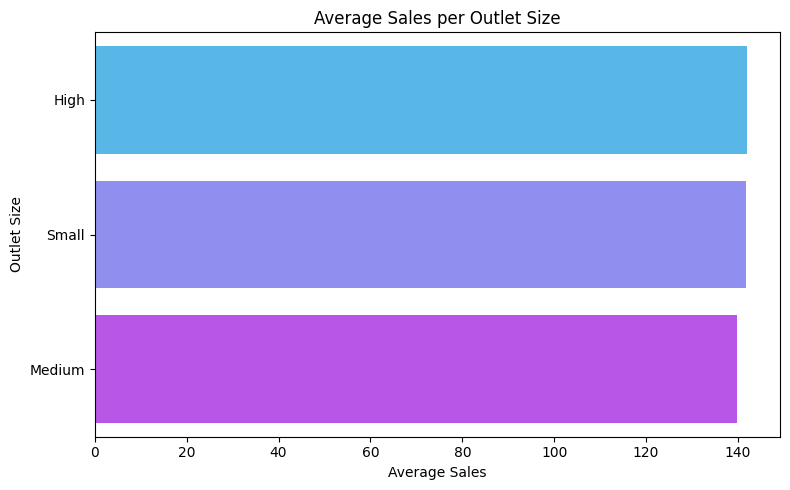

C:\Users\maiti\AppData\Local\Temp\ipykernel_3644\3067158944.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_fat.index, y=sales_by_fat.values, palette='Spectral')


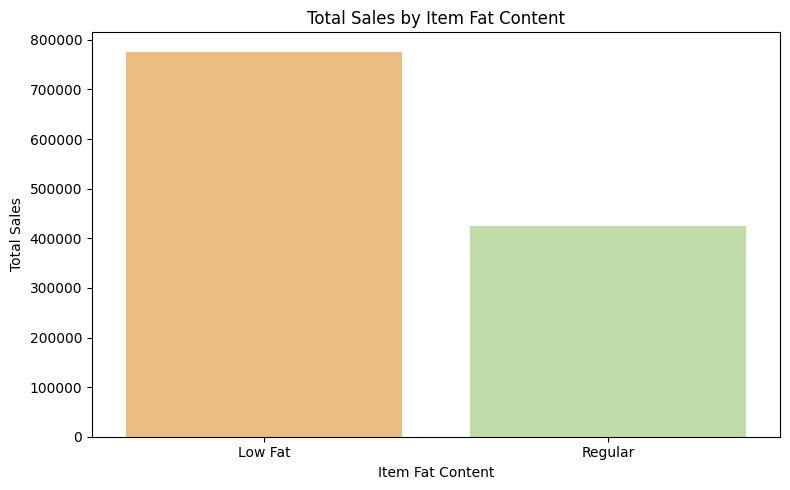

C:\Users\maiti\AppData\Local\Temp\ipykernel_3644\3067158944.py:158: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=visibility_by_item.values, y=visibility_by_item.index, palette='viridis')


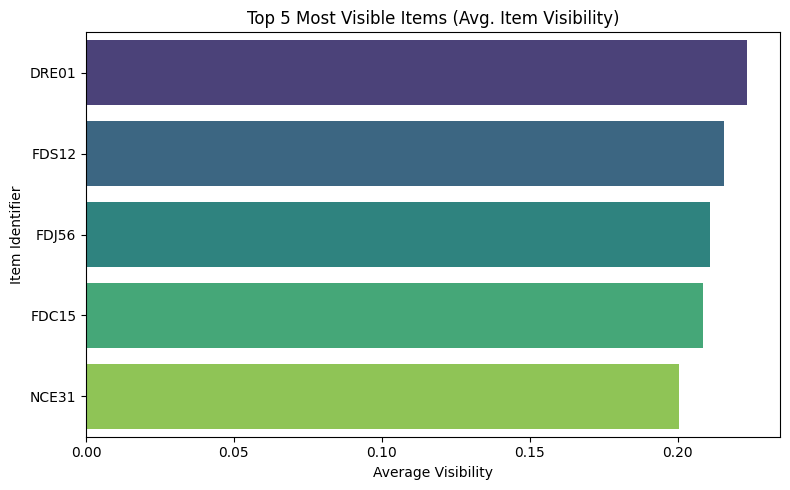

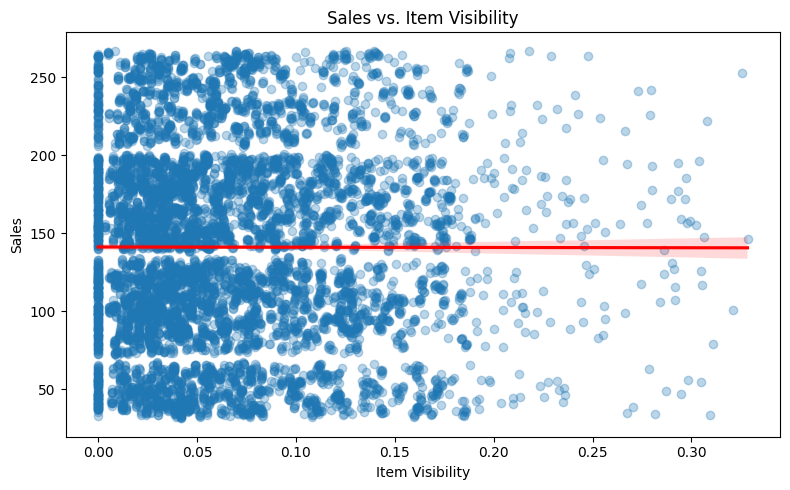

Pearson Correlation between Sales and Item Visibility: -0.001


In [25]:
# Sales Performance KPIs

# import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
# 1.Total Sales( Sum of all sales across items and outlets)
total_sales = df_new['Sales'].sum()
sales_by_item_type = df_new.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

# Plot: Total Sales Contribution by each Item Type
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Blues_d", len(sales_by_item_type))
bars = plt.bar(sales_by_item_type.index, sales_by_item_type.values, color=colors)
plt.title(f"💰 Total Sales: ₹{total_sales:,.0f}", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Sales (₹)")
plt.xlabel("Item Type")
plt.tight_layout()
plt.grid(axis='y')
plt.show()
# 2.Average Sales per Product(Mean sales across unique items)

# Group by Item Identifier to calculate average sales
avg_sales = df_new.groupby('Item Identifier')['Sales'].mean().sort_values(ascending=False)

# Plot top 10 items with highest average sales
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales.head(10).values, y=avg_sales.head(10).index, palette='viridis')
plt.title("Average Sales per Product (Top 10)")
plt.xlabel("Average Sales")
plt.ylabel("Item Identifier")
plt.tight_layout()
plt.show()
# 3. Top 5 Selling Products (by total sales):Items that contribute most to revenue
# Group by Item Identifier and sum the sales
top_selling = df_new.groupby('Item Identifier')['Sales'].sum().sort_values(ascending=False).head(5)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=top_selling.values, y=top_selling.index, palette='magma')
plt.title("Top 5 Selling Products by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Item Identifier")
plt.tight_layout()
plt.show()
# 4.Sales per Item Type(Category-level revenue distribution)
# Group by Item Type and sum the sales
sales_by_type = df_new.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_type.values, y=sales_by_type.index, palette='cubehelix')
plt.title("Sales per Item Type (Category-level Revenue Distribution)")
plt.xlabel("Total Sales")
plt.ylabel("Item Type")
plt.tight_layout()
plt.show()

#5.Sales per Outlet(Identify high- and low-performing stores)
# Group by Outlet Identifier and sum the sales
sales_by_outlet = df_new.groupby('Outlet Identifier')['Sales'].sum().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_outlet.values, y=sales_by_outlet.index, palette='coolwarm')
plt.title("Sales per Outlet (Identify High- and Low-Performing Stores)")
plt.xlabel("Total Sales")
plt.ylabel("Outlet Identifier")
plt.tight_layout()
plt.show()

#Outlets performance KPIs
# 6.Average Sales per Outlet Type(Compare performance across different outlet types)
# Group by Outlet Type and calculate average sales
avg_sales_by_type = df.groupby('Outlet Type')['Sales'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_sales_by_type.values, y=avg_sales_by_type.index, palette='Set2')
plt.title('Average Sales per Outlet Type')
plt.xlabel('Average Sales')
plt.ylabel('Outlet Type')
plt.tight_layout()
plt.show()

# 7.Sales per Outlet Age(Are older outlets performing better or worse?)
# Calculate outlet age (assuming current year is 2025)
df_new['Outlet Age'] = 2025 - df_new['Outlet Establishment Year']

# Group by Outlet Age and sum sales
sales_by_age = df_new.groupby('Outlet Age')['Sales'].sum().sort_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_age.index, y=sales_by_age.values, palette='Blues')
plt.title('Total Sales by Outlet Age')
plt.xlabel('Outlet Age (Years)')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# 8.Sales per Location Type(Compare revenue generated by Urban, Tier 1, and Tier 2 locations)
 #Group by Location Type and Sales 
sales_by_location=df_new.groupby('Outlet Location Type')['Sales'].sum().sort_values(ascending=False)
#plot
plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_location.index,y=sales_by_location.values,palette='Set3')
plt.title('Total Sales by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show 
 # 9.Outlet Count by Outlet Size(How many small, medium, large outlets exist?)
# Countplot of outlet sizes
plt.figure(figsize=(8, 5))
sns.countplot(data=df_new, y='Outlet Size', order=df_new['Outlet Size'].value_counts().index, palette='Pastel1')
plt.title('Number of Outlets by Size')
plt.xlabel('Count')
plt.ylabel('Outlet Size')
plt.tight_layout()
plt.show()

# 10.Average Sales per Outlet Size(See if outlet size correlates with performance)
# Group by Outlet Size and calculate average sales
avg_sales_by_size = df_new.groupby('Outlet Size')['Sales'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_sales_by_size.values, y=avg_sales_by_size.index, palette='cool')
plt.title('Average Sales per Outlet Size')
plt.xlabel('Average Sales')
plt.ylabel('Outlet Size')
plt.tight_layout()
plt.show()


#Product & Inventory KPIs

# 11.Sales by Item Fat Content(Is there more demand for Low Fat or Regular products)
# Group by Item Fat Content and sum sales
sales_by_fat = df_new.groupby('Item Fat Content')['Sales'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_fat.index, y=sales_by_fat.values, palette='Spectral')
plt.title('Total Sales by Item Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# 12.Top 5 Visible Items ( Which items are shown most on shelves or ads)
#Group by Item Identifier and get average visibility
visibility_by_item = df_new.groupby('Item Identifier')['Item Visibility'].mean().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=visibility_by_item.values, y=visibility_by_item.index, palette='viridis')
plt.title('Top 5 Most Visible Items (Avg. Item Visibility)')
plt.xlabel('Average Visibility')
plt.ylabel('Item Identifier')
plt.tight_layout()
plt.show()

# 13.Sales vs. Visibility Correlation(Does higher visibility lead to higher sales)
# Scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(data=df_new, x='Item Visibility', y='Sales', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Sales vs. Item Visibility')
plt.xlabel('Item Visibility')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

# Correlation coefficient
correlation = df_new['Item Visibility'].corr(df_new['Sales'])
print(f"Pearson Correlation between Sales and Item Visibility: {correlation:.3f}")






### **Business Performance Indicators**

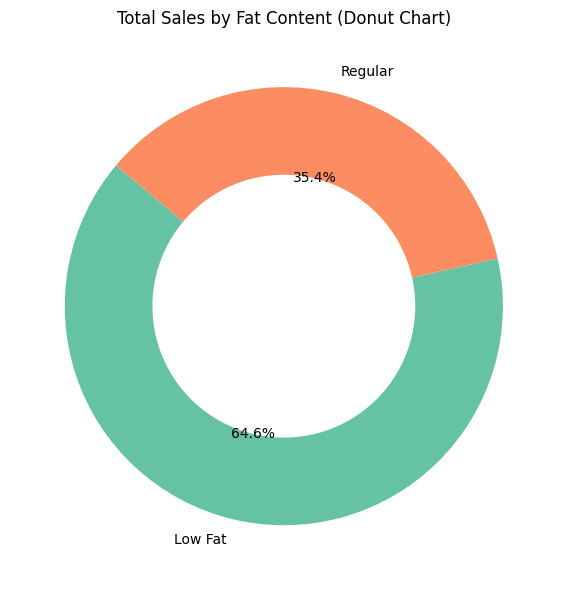


🧈 Low Fat:
  - Total Sales: ₹776,319.68
  - Average Sales per Item: ₹140.71
  - Number of Items: 5517

🧈 Regular:
  - Total Sales: ₹425,361.80
  - Average Sales per Item: ₹141.50
  - Number of Items: 3006


In [19]:
# 1.Total Sales by Fat Content
import matplotlib.pyplot as plt

# Group by Fat Content
fat_sales = df_new.groupby('Item Fat Content')['Sales'].sum()
fat_avg_sales = df_new.groupby('Item Fat Content')['Sales'].mean()
fat_counts = df_new['Item Fat Content'].value_counts()

# Donut chart for Total Sales
colors = ['#66c2a5','#fc8d62','#8da0cb']
plt.figure(figsize=(6,6))
plt.pie(fat_sales, labels=fat_sales.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'width': 0.4})
plt.title("Total Sales by Fat Content (Donut Chart)")
plt.tight_layout()
plt.show()

# Print KPI metrics
for fat in fat_sales.index:
    print(f"\n {fat}:")
    print(f"  - Total Sales: ₹{fat_sales[fat]:,.2f}")
    print(f"  - Average Sales per Item: ₹{fat_avg_sales[fat]:,.2f}")
    print(f"  - Number of Items: {fat_counts[fat]}")


C:\Users\maiti\AppData\Local\Temp\ipykernel_3644\2224246522.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=itemtype_sales.values, y=itemtype_sales.index, palette='crest')


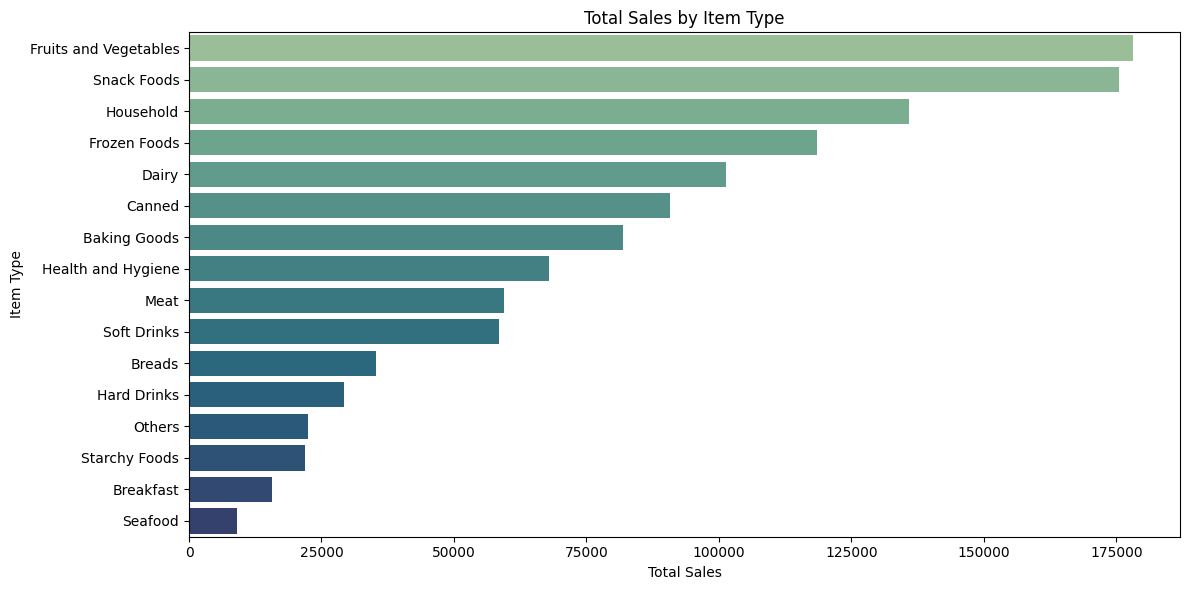


📦 KPI Metrics by Item Type (Top 5)

🛒 Fruits and Vegetables:
  - Total Sales: ₹178,124.08
  - Average Sales per Item: ₹144.58
  - Number of Items: 1232

🛒 Snack Foods:
  - Total Sales: ₹175,433.92
  - Average Sales per Item: ₹146.19
  - Number of Items: 1200

🛒 Household:
  - Total Sales: ₹135,976.53
  - Average Sales per Item: ₹149.42
  - Number of Items: 910

🛒 Frozen Foods:
  - Total Sales: ₹118,558.88
  - Average Sales per Item: ₹138.50
  - Number of Items: 856

🛒 Dairy:
  - Total Sales: ₹101,276.46
  - Average Sales per Item: ₹148.50
  - Number of Items: 682


In [20]:
# 2.Total Sales by Item Type 
import seaborn as sns

# Total and Average Sales per Item Type
itemtype_sales = df_new.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
itemtype_avg_sales = df_new.groupby('Item Type')['Sales'].mean()
itemtype_counts = df_new['Item Type'].value_counts()

# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=itemtype_sales.values, y=itemtype_sales.index, palette='crest')
plt.title('Total Sales by Item Type')
plt.xlabel('Total Sales')
plt.ylabel('Item Type')
plt.tight_layout()
plt.show()

# KPI Printout (Top 5 for brevity)
print("\n📦 KPI Metrics by Item Type (Top 5)")
for item in itemtype_sales.head(5).index:
    print(f"\n🛒 {item}:")
    print(f"  - Total Sales: ₹{itemtype_sales[item]:,.2f}")
    print(f"  - Average Sales per Item: ₹{itemtype_avg_sales[item]:,.2f}")
    print(f"  - Number of Items: {itemtype_counts[item]}")


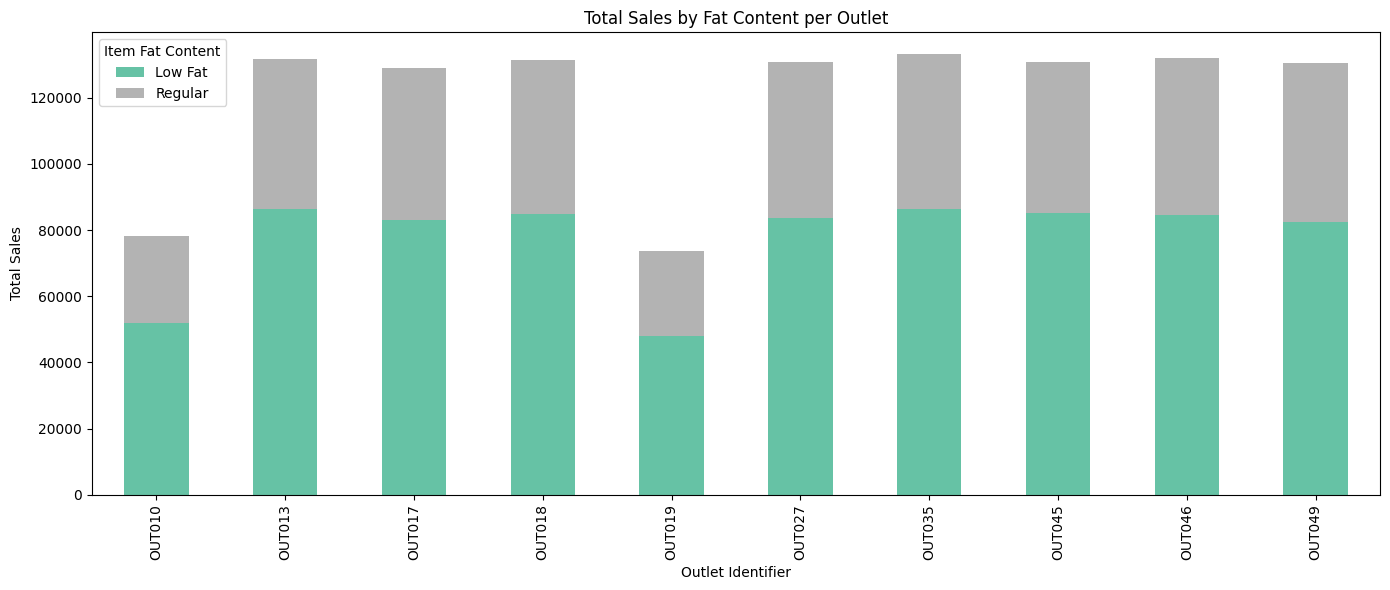


🏪 Sample KPI Metrics by Outlet and Fat Content (First 3 outlets):

Outlet OUT010:
  - Low Fat Sales: ₹51,785.83
  - Regular Sales: ₹26,345.74

Outlet OUT013:
  - Low Fat Sales: ₹86,402.14
  - Regular Sales: ₹45,406.87

Outlet OUT017:
  - Low Fat Sales: ₹82,947.05
  - Regular Sales: ₹46,156.91


In [21]:
#3.Fat Content by Outlet for Total Sales 
# Pivot table for stacked column
fat_outlet_sales = df_new.pivot_table(values='Sales', index='Outlet Identifier', columns='Item Fat Content', aggfunc='sum', fill_value=0)

# Plot stacked bar
fat_outlet_sales.plot(kind='bar', stacked=True, figsize=(14,6), colormap='Set2')
plt.title('Total Sales by Fat Content per Outlet')
plt.xlabel('Outlet Identifier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

# Optional: KPI printout for a few outlets
print("\n🏪 Sample KPI Metrics by Outlet and Fat Content (First 3 outlets):")
for outlet in fat_outlet_sales.index[:3]:
    print(f"\nOutlet {outlet}:")
    for fat in fat_outlet_sales.columns:
        print(f"  - {fat} Sales: ₹{fat_outlet_sales.loc[outlet, fat]:,.2f}")


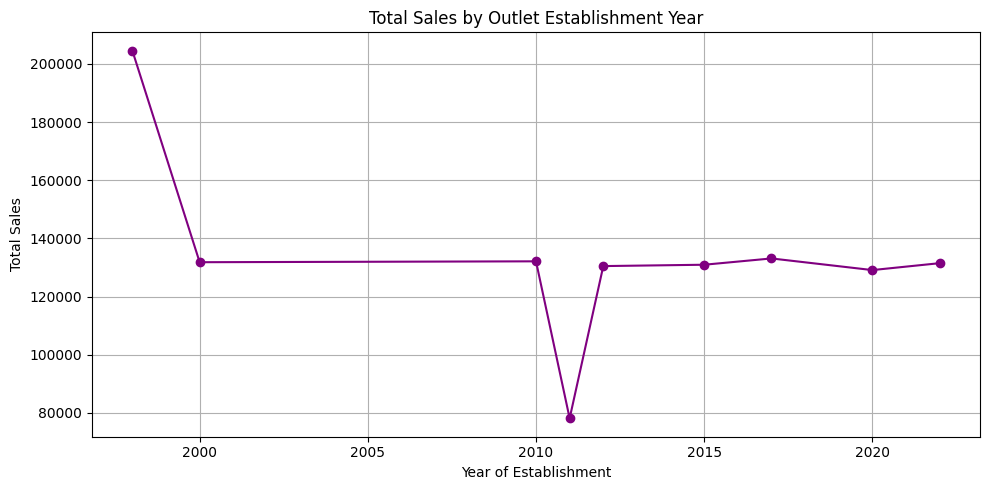

In [22]:
# 4.Total Sales by Outlet Establishment:
# Group by establishment year
sales_by_est_year = df_new.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

# Plot Line Chart
plt.figure(figsize=(10,5))
plt.plot(sales_by_est_year.index, sales_by_est_year.values, marker='o', linestyle='-', color='purple')
plt.title('Total Sales by Outlet Establishment Year')
plt.xlabel('Year of Establishment')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


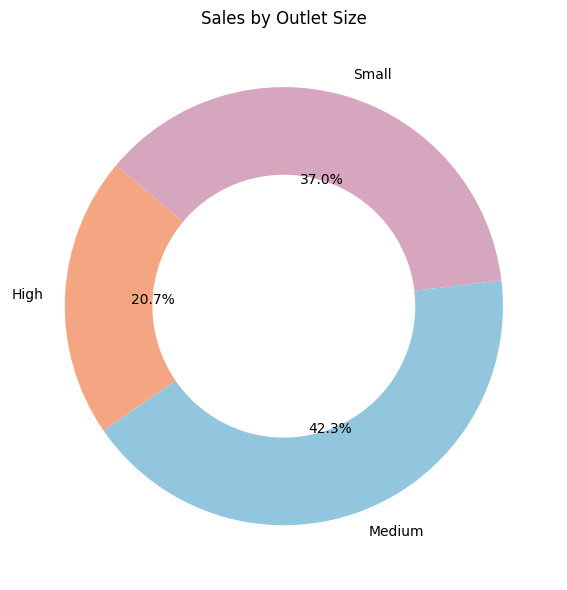

🏬 High Outlet Total Sales: ₹248,991.58
🏬 Medium Outlet Total Sales: ₹507,895.73
🏬 Small Outlet Total Sales: ₹444,794.17


In [23]:
# 5.Sales outlet Size
# Group by Outlet Size
sales_by_size = df_new.groupby('Outlet Size')['Sales'].sum()

# Donut chart
colors = ['#f4a582', '#92c5de', '#d5a6bd']
plt.figure(figsize=(6,6))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'width': 0.4})
plt.title("Sales by Outlet Size")
plt.tight_layout()
plt.show()

# Print summary
for size in sales_by_size.index:
    print(f"🏬 {size} Outlet Total Sales: ₹{sales_by_size[size]:,.2f}")



C:\Users\maiti\AppData\Local\Temp\ipykernel_3644\1164376713.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_location.values, y=sales_by_location.index, palette='magma')


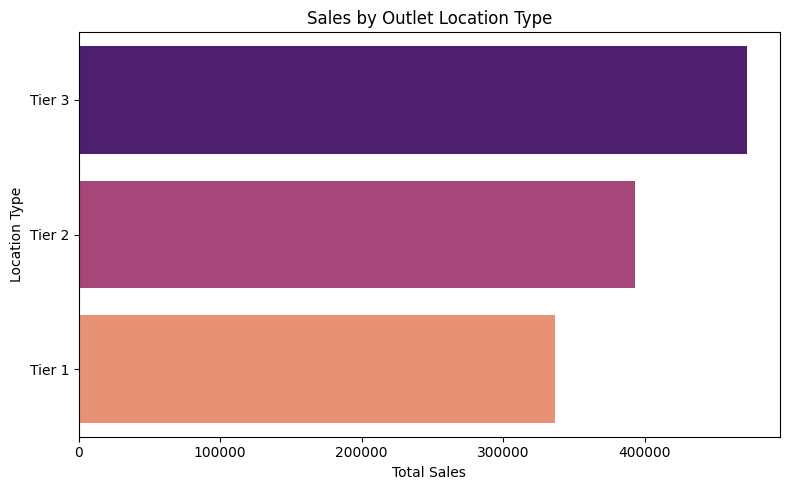

📍 Tier 3: ₹472,133.03
📍 Tier 2: ₹393,150.64
📍 Tier 1: ₹336,397.81


In [24]:
# 6.Sales by Outlet Location Type
# Group by Location Type
sales_by_location = df_new.groupby('Outlet Location Type')['Sales'].sum().sort_values(ascending=False)

# Funnel-style Bar Chart
plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_location.values, y=sales_by_location.index, palette='magma')
plt.title('Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Location Type')
plt.tight_layout()
plt.show()

# Print details
for loc in sales_by_location.index:
    print(f"📍 {loc}: ₹{sales_by_location[loc]:,.2f}")
